# <font color="red">K nearest neighbour </font>

K - Nearest Neighbor Algorithm:-

K-Nearest neighbor, by and large, curtailed as K-NN is the most straightforward, yet incredible Machine Learning Technique. 
Utilizing this methodology, we can decide the class of a data point by evaluating the class or gathering in which 
its nearest neighbors are in.



1. import the libraries 

In [5]:
import numpy as np #holds the homogenous data
import pandas as pd #supports files of differnt formats
from matplotlib import pyplot as plt # used to visualize the data
from sklearn.datasets import load_breast_cancer #import the dataset 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

2. load the dataset breast_cancer divide the data into two categories namely malignant and benign, 
which consists of thirty features

In [6]:
breast_cancer = load_breast_cancer() #import the dataset
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
#encode categorical data
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

3.data is splitted into test and training to find the model works for the classifying data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

 4.KNeighborsClassifier() looks for the nearest neighbours by making use of Euclidean distance to determine the proximity.

In [8]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

C:\Users\srilekha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

5.By making use of trained model predict a tumor belongs to benign or not

In [9]:
y_pred = knn.predict(X_test)

6.By visualization observe the predicted model with the testing set samples and displays the data in 0's and 1's.

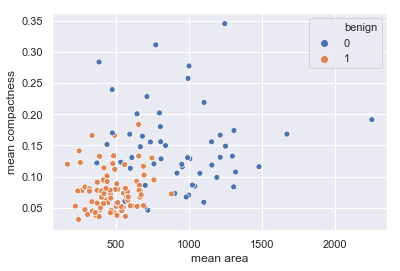

In [10]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

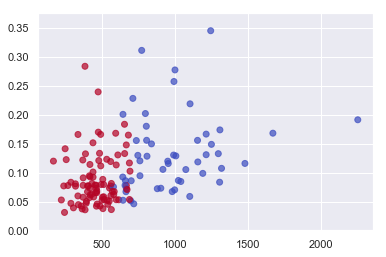

In [11]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

 7. To evluate the model make use of confuson matrix, the diagonal numbers represent the correct predictions and rest correspond to  false positives and false negatives

In [12]:
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]], dtype=int64)

8. Model has an accuracy of 121/143=84.6%

Knn algorithm makes use of Euclidean distance to calculate the proximity between neighboring points. Based on distance between the points determines the K closest points. This algorithm finds a target label for each of the neighbors and place the new data in the same category of the majority.
pros:
1.For avaialable of new data, any additional training algorithm is not required by the k nearest neighbors algorithm 
(No assumptions about data).
2.It calculates some distance and find the K closest points and this algorithm is easy to understand.
3.It can be applied for both classificaton and regression.
cons:
It requires high memory to train the data, Sensitive to irrelevant features and scale of the data.
